# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

B:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
B:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
B:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


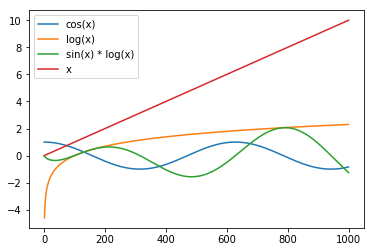

In [2]:
space = np.linspace(0, 10, num=1000)
cos = np.cos(space)
log = np.log(space)
sin_log = np.sin(space) * np.log(space)
lin = space
plt.plot(cos)
plt.plot(log)
plt.plot(sin_log)
plt.plot(lin)
plt.legend(['cos(x)', 'log(x)', 'sin(x) * log(x)', 'x'])
plt.show()

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

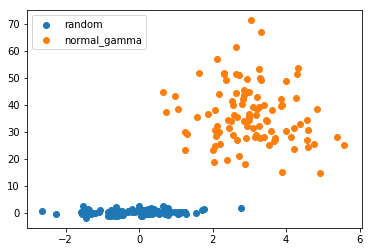

In [3]:
blob_size = 100

r_x, r_y = np.random.randn(blob_size), np.random.randn(blob_size)
plt.scatter(r_x, r_y)

n_x = np.random.normal(3, 1, size=blob_size)
g_y = np.random.gamma(12, 3, size=blob_size)
plt.scatter(n_x, g_y)

plt.legend(('random', 'normal_gamma'))


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('./../data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

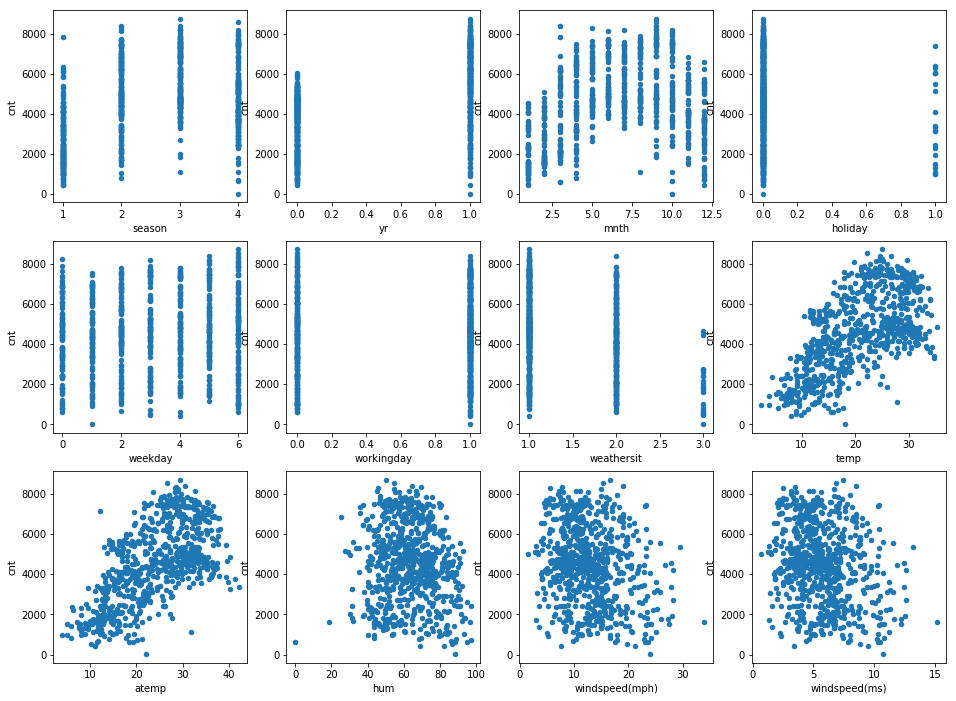

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: нелинейный

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lmplot.

ответ: season, weathersit

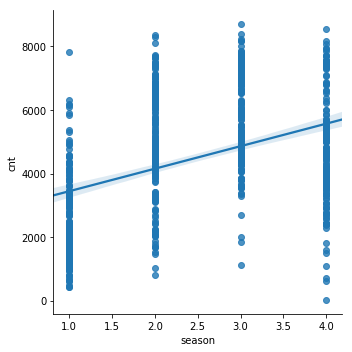

In [7]:
sns.lmplot(x='season', y='cnt', data=df)

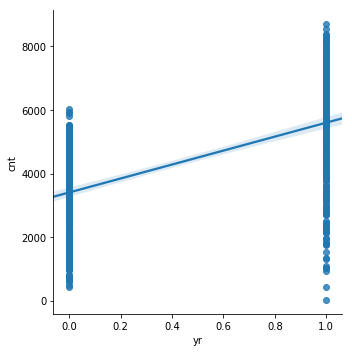

In [8]:
sns.lmplot(x='yr', y='cnt', data=df)

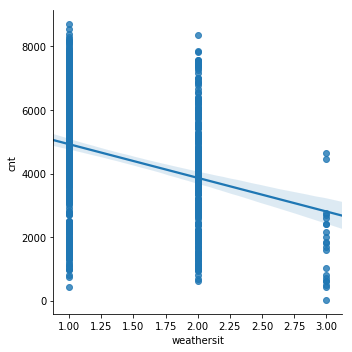

In [9]:
sns.lmplot(x='weathersit', y='cnt', data=df)

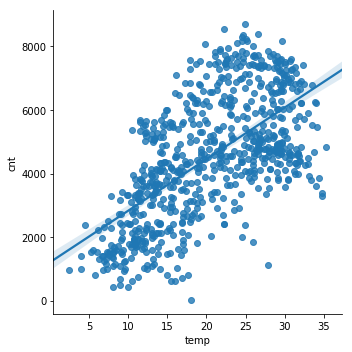

In [10]:
sns.lmplot(x='temp', y='cnt', data=df)

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: меньше - holiday, weekday, workingday, hum; больше - yr, temp, atemp.

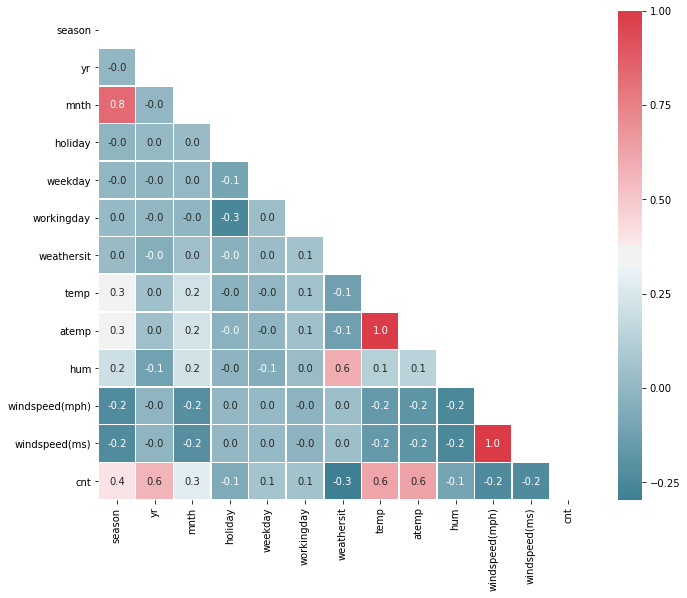

In [11]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: во втором году было больше прокатов.

<Container object of 366 artists>

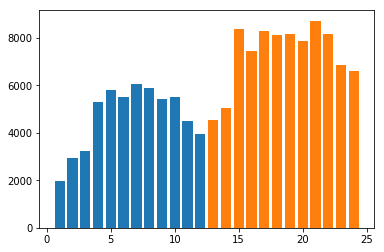

In [12]:
#sns.factorplot(x='mnth', y='cnt', data=df[df.yr == 0], kind='bar')
#sns.factorplot(x='mnth', y='cnt', data=df[df.yr == 1], kind='bar')
plt.bar(df[df.yr == 0].mnth, df[df.yr == 0].cnt)
plt.bar(df[df.yr == 1].mnth + 12, df[df.yr == 1].cnt)

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: данные не собирались в чрезвычайно плохую погоду(weathersit=4)
    
Ответ: равномерное(точнее близкое к нему)

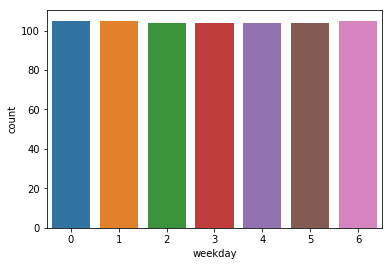

In [13]:
sns.countplot(x="weekday", data=df)

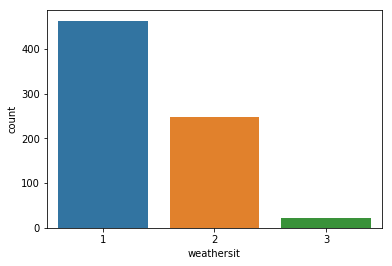

In [14]:
sns.countplot(x="weathersit", data=df)

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 5000

Ответ: нормальное(точнее близкое к нему)

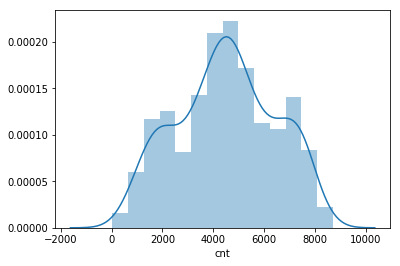

In [15]:
sns.distplot(df.cnt.dropna())

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: настораживает "прямая". Хотя, вообще говоря, "прямая" настораживать не должна, т.к. люди относительно адекватно воспринимают температуру. На самом деле насторожить может выброс, находящийся в нижней полуплоскости отн-но x=y, но его можно оправдать сильным ветром или гипервосприимчивостью к иным аспектам погоды у человека.

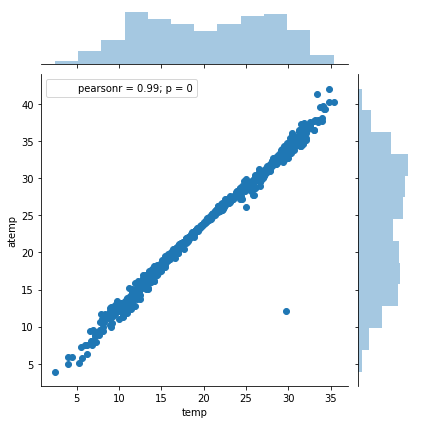

In [16]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: возможно, что в некоторые такие месяцы(например, 4, 5, 6, 8, 9, 11) людям больше нравится находиться на природе в выходной день(в т.ч. из-за периодов "каникул", праздников, хорошей погоды), а в таки месяцы как [1, 2, 3, 10, 12] людям приходится брать велосипеды в т.ч. для того, чтобы быстрее доехать на работу.

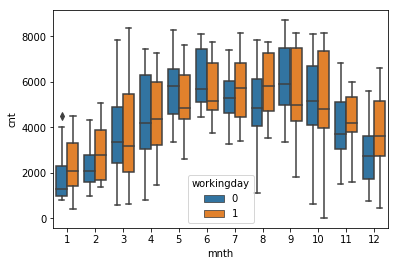

In [17]:
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)

## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: при более сильном ветре людям в основном кажется, что на улице холоднее, чем есть на самом деле.
Для создания графика я добавил в таблицу новый признак "предполагаемое значение температуры - истинное значение". Чем больше значение признака - тем большую температуру предполагали люди, чем меньше - тем меньшую. Большинство точек сконцентрировано около значения признака = 5, что больше 0, т.е. верного угадывания. Значит, люди считали, что температура выше, чем есть на самом деле. Я решил выяснить какое количество наблюдений было при температуре ниже 0, оказалось, что их число - 0.
Такое распределение можно списать на то, что воздух был достаточно горячим(и возможно влажным) и теплый ветер заставлял людей думать, что температура выше.

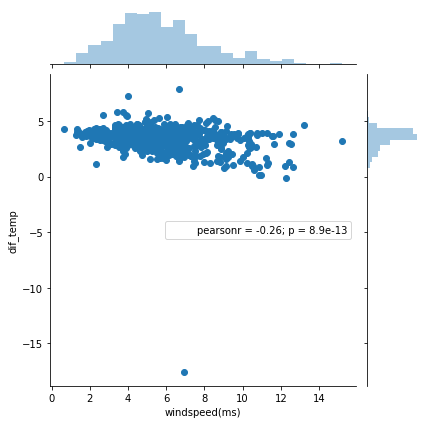

In [18]:
df['dif_temp'] = df.atemp - df.temp
sns.jointplot(x='windspeed(ms)', y='dif_temp', data=df)

In [19]:
len(df) - len(df[df.atemp >= 0])

0

In [20]:
len(df) - len(df.temp >= 0)

0